In [4]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 95.3 MB/s eta 0:00:00


Corpus size (sentences): 7
Model trained. Vocabulary size: 39

Similarity between 'dog' and 'pet': 0.0641
Extracted 39 vectors of dimension 50


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


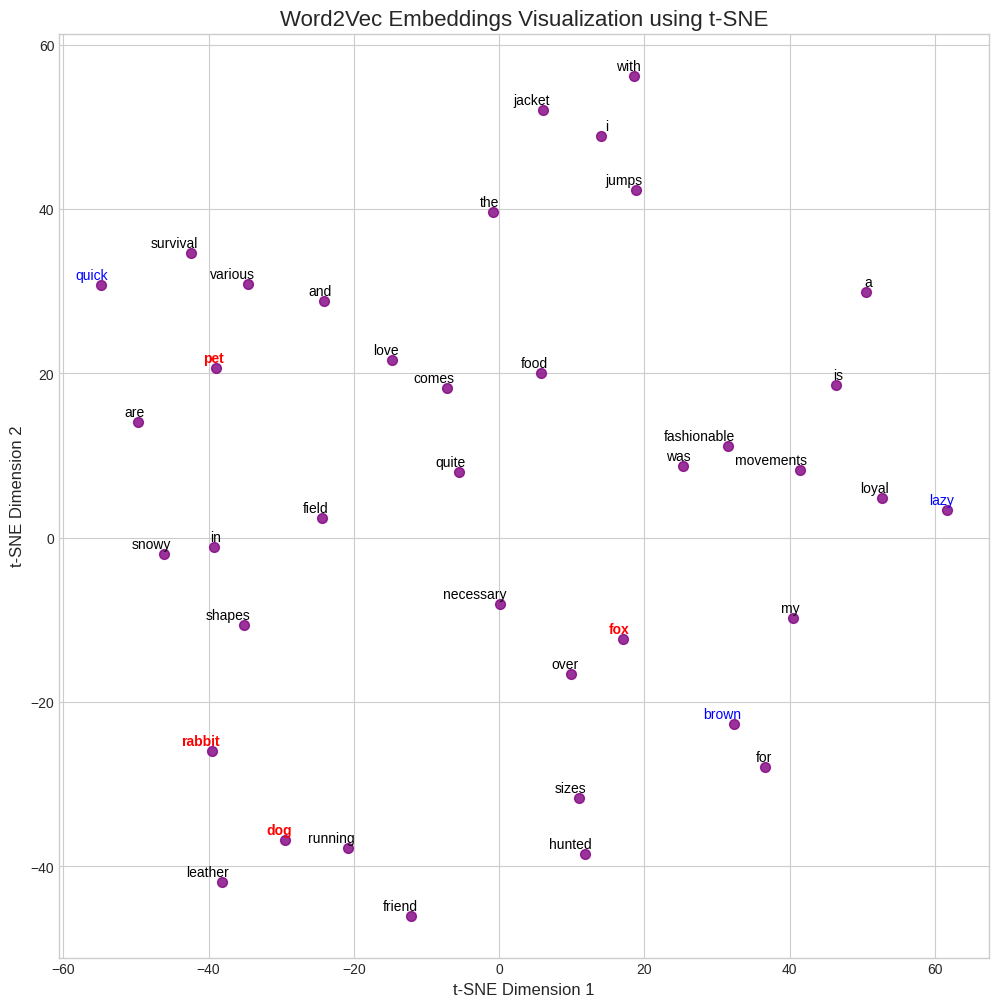


Visualization complete. A plot showing the 2D word embeddings has been generated.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

corpus = [
    "The quick brown fox jumps over the lazy dog".lower().split(),
    "A dog is a loyal pet and a friend".lower().split(),
    "The fox hunted the rabbit in the snowy field".lower().split(),
    "Quick movements are necessary for survival".lower().split(),
    "The brown leather jacket was quite fashionable".lower().split(),
    "Pet food comes in various shapes and sizes".lower().split(),
    "I love running in the field with my dog".lower().split()
]

print(f"Corpus size (sentences): {len(corpus)}")


model = Word2Vec(
    sentences=corpus,
    vector_size=50,  # 50 dimensions
    window=5,
    min_count=1,
    workers=4,
    sg=1
)

model.train(corpus, total_examples=model.corpus_count, epochs=100)
print(f"Model trained. Vocabulary size: {len(model.wv.index_to_key)}")


similarity = model.wv.similarity('dog', 'pet')
print(f"\nSimilarity between 'dog' and 'pet': {similarity:.4f}")

# We'll extract all unique words and their corresponding vectors
words = model.wv.index_to_key
vectors = model.wv[words]

print(f"Extracted {len(vectors)} vectors of dimension {vectors.shape[1]}")


tsne_model = TSNE(
    n_components=2,           # Target dimension: 2D
    perplexity=5,             # Controls the balance between local and global aspects of data
    n_iter=2500,              # Number of iterations
    random_state=42,          # For reproducible results
    learning_rate='auto',     # Automatically set learning rate
    init='pca'                # Faster and more robust initialization
)

vectors_2d = tsne_model.fit_transform(vectors)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 12))

# Scatter plot the 2D points
ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='purple', alpha=0.8, s=50)

for i, word in enumerate(words):
    x = vectors_2d[i, 0]
    y = vectors_2d[i, 1]

    if word in ['dog', 'fox', 'rabbit', 'pet']:
        color = 'red'
        fontweight = 'bold'
    elif word in ['quick', 'brown', 'lazy']:
        color = 'blue'
        fontweight = 'normal'
    else:
        color = 'black'
        fontweight = 'normal'

    ax.annotate(
        word,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom',
        fontsize=10,
        color=color,
        fontweight=fontweight
    )

ax.set_title('Word2Vec Embeddings Visualization using t-SNE', fontsize=16)
ax.set_xlabel('t-SNE Dimension 1', fontsize=12)
ax.set_ylabel('t-SNE Dimension 2', fontsize=12)
plt.grid(True)
plt.show()

print("\nVisualization complete. A plot showing the 2D word embeddings has been generated.")
